Directory 'new_simulation_training_qgram/signal/' already exists.
Generating 12600 signal qgram...

[----------------------------------------] 0%

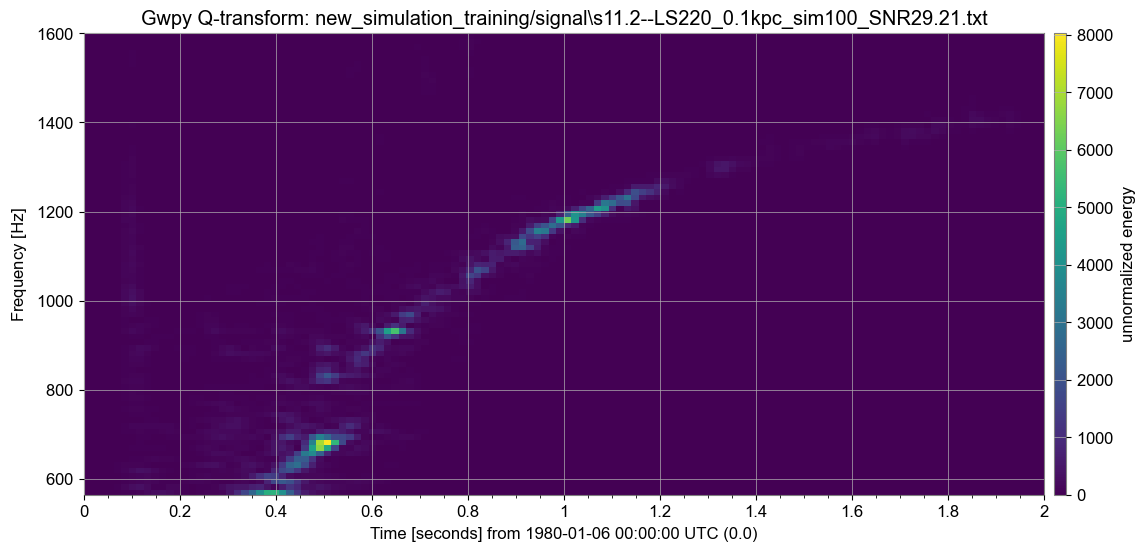

In [1]:
# Update from 1 Mar 2024
# 1: remove time shifting, this may create unexpected result!
# 2: updated the q-transform parameters
# 3: band pass the signal before taking the q-transform

from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
from PIL import Image
import numpy as np
import os
from glob import glob
from matplotlib import colormaps
import pandas as pd
cmap = colormaps['gray']

fs = pow(2,14)
#t0_dict = {"s15.0--GShen": 0.144, "s20.0--SFHo": 0.023, "s15.0--SFHo": 0.106}

read_path = "new_simulation_training/signal/"
#save_path = "qgrams_test/signal/"
save_path = "new_simulation_training_qgram/signal/"
# Check if the directory exists
if not os.path.exists(save_path):
    # If it doesn't exist, create it
    os.makedirs(save_path)
    print(f"Directory '{save_path}' created.")
else:
    print(f"Directory '{save_path}' already exists.")
    
# Function to create a text-based progress bar
def progress_bar(iterable, total, length=40):
    progress = int(length * iterable / total)
    bar = f"[{'#' * progress}{'-' * (length - progress)}] {100 * iterable // total}%"
    print(f"\r{bar}", end="", flush=True)
    
file_list = glob(os.path.join(read_path, '*.txt'))
N_file = len(file_list)
print(f"Generating {N_file} signal qgram...\n")
for i in range(1): #range(len(file_list)):
    # Initialize an empty list to store the numbers
    strain = []
    strain_puresig = [] # for testing the pure signal
    double_column = True
    # Open the file in read mode
    with open(file_list[i], "r") as file:
        # Iterate through each line in the file
        for line in file:
            # Convert each line to a float and append it to the list
            try:
                if double_column:
                    parts = line.strip().split()
                    number = float(parts[1]); # use only the second column for strain
                else:
                    number = float(line.strip())
                strain.append(number)
            except ValueError:
                # Handle any invalid values or exceptions
                print(f"Skipping invalid value: {line.strip()}")
    
    # the following part is for testing the spectogram for the pure signal
    #with open("pure signal\gw_s15.0--SFHo--GravA.dat", "r") as file:
        # Iterate through each line in the file
        #for line in file:
            # Convert each line to a float and append it to the list
            #try:
                #if double_column:
                    #parts = line.strip().split()
                    #number = float(parts[1]); # use only the second column for strain
                #else:
                    #number = float(line.strip())
                #strain_puresig.append(number)
            #except ValueError:
                # Handle any invalid values or exceptions
                #print(f"Skipping invalid value: {line.strip()}")
                
    # shift the signal to center so when performing q-transform it is not attenuated away by windowing
    #EOS = os.path.splitext(os.path.basename(file.name))[0].split('_')[0]
    #t_shift = t0_dict.get(EOS) if EOS in t0_dict else 0
    #idx_shift = round((0.4-t_shift)*fs)
    
    #hdata = TimeSeries(strain[-idx_shift:]+strain[:-idx_shift], sample_rate=fs) # the raw signal data with noise imposed
    hdata = TimeSeries(strain, sample_rate=fs) # the raw signal data with noise imposed
    
    #hdata_puresig = TimeSeries(strain_puresig, sample_rate=fs) # the pure signal from simulation without any noise
    
    hdata_filtered = hdata.bandpass(100,2000) # band pass filtering the signal
    
    hq = hdata_filtered.q_transform(qrange=(100,200), frange=(0, 1600),
                                    tres=(2-0)/128, fres=(1600-0)/128, norm='Median', whiten=False)  
        
    # use spectrogram for comparison
    #hq = hdata_filtered.spectrogram(stride=1/64)
    
    # plotting qgram
    fig4 = hq.plot()
    ax = fig4.gca()
    fig4.colorbar(label="unnormalized energy")
    ax.set_title("Gwpy Q-transform: " + file_list[i])
    #ax.set_ylim(0, 2000)
    
    
    #fig4 = hdata.plot()
    #ax = fig4.gca()
    #ax.set_xlabel("Time [s]")
    #ax.set_ylabel("Strain")
    # display spectrogram of the signal as a reference
    #h_spectro = hdata.spectrogram(stride=1/64)
    #fig5 = h_spectro.plot()
    #ax = fig5.gca()
    #ax.set_ylim(0, 2000)
    #ax.set_xlabel("Time [s]")
    #fig5.colorbar(label="Power [dB]")
    #ax.set_title("Gwpy Spectrogram: s15.0--SFHo at 0.1kpc")
    
    # save the q-transform output data
    #df = pd.DataFrame(hq.value)
    #df.to_csv(os.path.join(save_path, "q_gram" + os.path.splitext(os.path.basename(file.name))[0] + ".csv"), header=False, index=False)
    
    # save the image locally
    #hq_array = np.flipud(np.transpose(hq.value))
    #print(f"qgram shape: {hq_array.shape}")
    #hq_rescale = 255 * (hq_array - np.min(hq_array))/(np.max(hq_array) - np.min(hq_array)) # rescale to 0 and 255
    #image = Image.fromarray(hq_rescale.astype(np.uint8))
    #file_name = os.path.splitext(os.path.basename(file.name))[0] + ".png"
    #save_name = os.path.join(save_path, file_name)
    #image.save(save_name)
        
    # Update the progress bar
    progress_bar(i + 1, N_file)

In [2]:
ax.get_ylim()

(562.6976928710938, 1600.19775390625)

In [3]:
ax.get_xlim()

(0.0, 2.0)